<a href="https://colab.research.google.com/github/pverma2/TranAD/blob/main/Knowledge_Distill_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount into drive
from google.colab import drive
drive.flush_and_unmount()
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/knowledge_distillation'

/content/drive/MyDrive/Colab Notebooks/knowledge_distillation


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Apr 30 08:13:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
############
## To prevent time out, copy following script in console of browser (Ctrl + Shift + i)
# function ClickConnect(){
# console.log("Working"); 
# document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
# }
# setInterval(ClickConnect,60000)
## Also, once done, type following command:
# clearInterval(clicker);
####################

1. Train a model without knowledge distillation

In [ ]:
from main import run


******************************
Arguments
******************************
distillation_weight: 0.0
temperature: 1
Finished Training, Best Accuracy: 0.861600 (at 149 epochs)


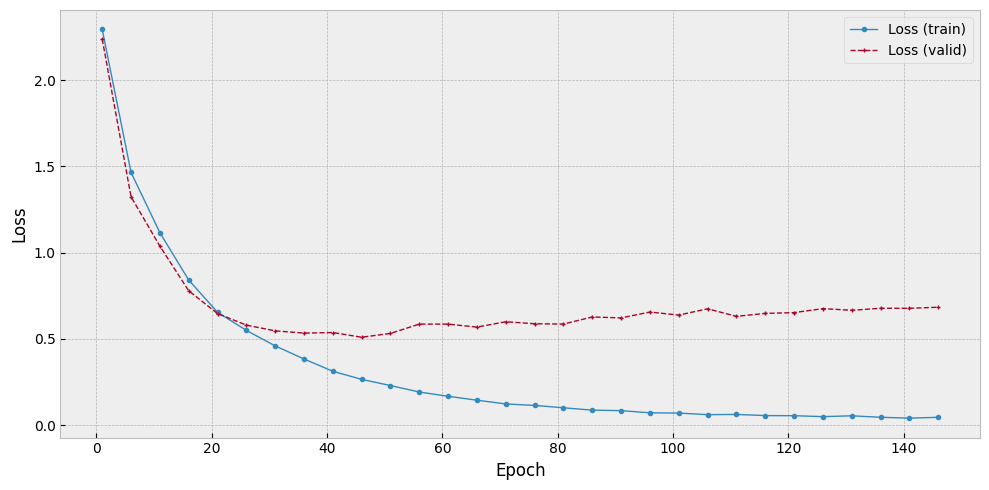

In [ ]:
#Baseline
run(batch_size = 1024, lr=0.025, epoch=150)

2. Train a model with knowledge distillation over a set of alpha and temperature

******************************
Arguments
******************************
distillation_weight: 0.5
temperature: 10
Finished Training, Best Accuracy: 0.903400 (at 133 epochs)


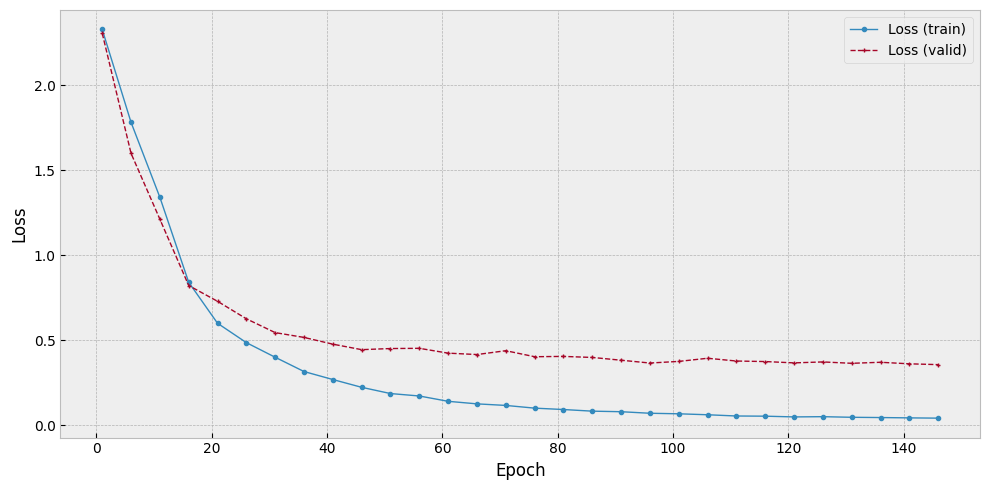

In [ ]:
# distillation
alphas = [0.1, 0.25, 0.5, 0.75, 0.95, 0.99]
temps = [1.5, 3, 5, 7, 10, 20, 30, 50, 75, 100]
for temp in temps:
  for alpha in alphas:
    run(distillation_weight = alpha, temperature = temp, batch_size = 1024, lr=0.025, epoch=150)